In [3]:
import pandas as pd

In [4]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt

In [6]:
import seaborn as sns

In [7]:
df = pd.read_csv(r'C:\Users\choco\OneDrive\Desktop\python\HR Analytics Job Change of Data Scientists.csv')
df.head(1)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.92,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0


In [6]:
df.info

<bound method DataFrame.info of        enrollee_id      city  city_development_index gender  \
0             8949  city_103                   0.920   Male   
1            29725   city_40                   0.776   Male   
2            11561   city_21                   0.624    NaN   
3            33241  city_115                   0.789    NaN   
4              666  city_162                   0.767   Male   
...            ...       ...                     ...    ...   
19153         7386  city_173                   0.878   Male   
19154        31398  city_103                   0.920   Male   
19155        24576  city_103                   0.920   Male   
19156         5756   city_65                   0.802   Male   
19157        23834   city_67                   0.855    NaN   

           relevent_experience enrolled_university education_level  \
0      Has relevent experience       no_enrollment        Graduate   
1       No relevent experience       no_enrollment        Graduate   
2

In [9]:
df.shape

(19158, 14)

In [10]:
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [13]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [14]:
df.dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                    float64
dtype: object

<Axes: >

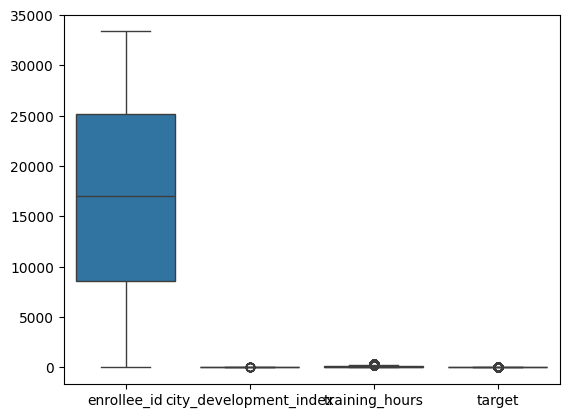

In [15]:
sns.boxplot(df)

In [16]:
for col in df.columns:
    df[col].fillna(df[col].mode()[0],inplace=True)

C:\Users\choco\AppData\Local\Temp\ipykernel_20428\893124906.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0],inplace=True)
C:\Users\choco\AppData\Local\Temp\ipykernel_20428\893124906.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

In [17]:
df.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [18]:
#1.   What is the average training hours by gender, and how can we visualize it using a bar plot?

<Axes: xlabel='gender', ylabel='count'>

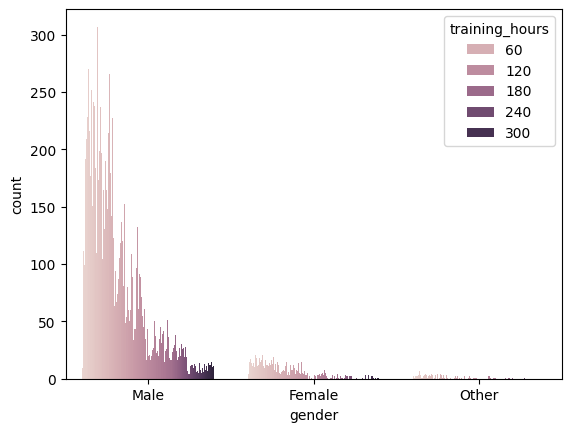

In [62]:
sns.countplot(x='gender',hue='training_hours',data=df)

In [21]:
#2.Visualize standard deviation of training hours by education level using a seaborn barplot.

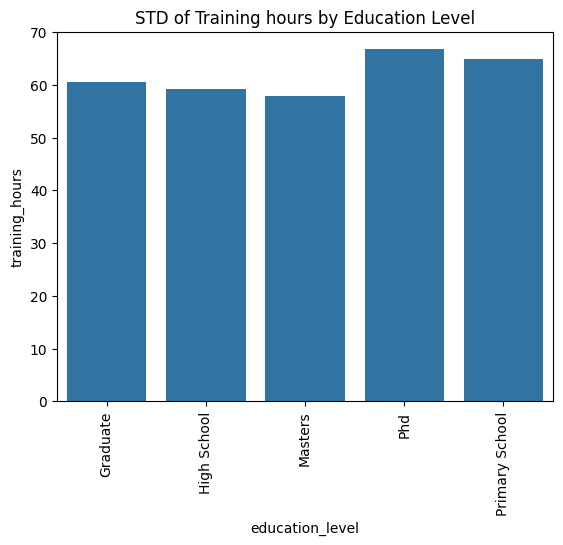

In [64]:
std_hours=df.groupby('education_level')['training_hours'].std().reset_index()
sns.barplot(data=std_hours,x='education_level',y='training_hours')
plt.title('STD of Training hours by Education Level')
plt.xticks(rotation=90)
plt.show()

In [28]:
#3.   Display and plot the count of people by gender and company type using unstack + heatmap.

In [75]:
hmap=df.groupby(['gender','company_type'])['company_type'].size().unstack()#size and count are same almost
hmap

company_type,Early Stage Startup,Funded Startup,NGO,Other,Public Sector,Pvt Ltd
gender,,,,,,
Female,41,92,54,12,97,942
Male,559,897,463,108,849,14853
Other,3,12,4,1,9,162


<Axes: xlabel='company_type', ylabel='gender'>

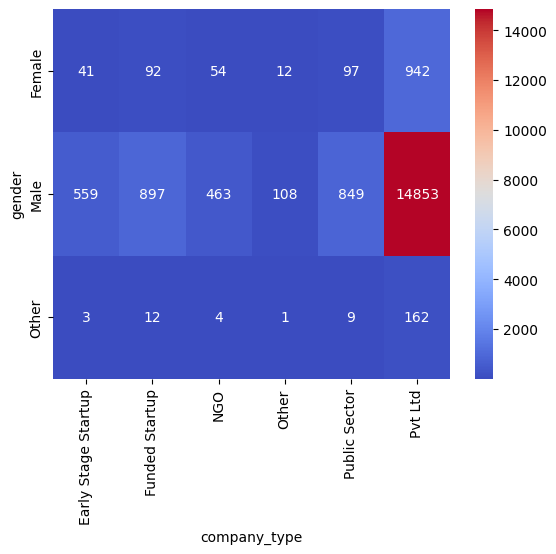

In [77]:
sns.heatmap(hmap,cmap='coolwarm',annot=True,fmt='d')

In [48]:
#4.   Create a pivot table of average training hours by education level and gender, then heatmap it.

In [55]:
pivot=df.pivot_table(index='gender',columns='education_level',values='training_hours')
pivot

education_level,Graduate,High School,Masters,Phd,Primary School
gender,,,,,
Female,66.295775,63.970149,64.793510,66.638298,24.500000
Male,65.845375,66.845070,63.184731,67.506887,64.432886
Other,65.950413,62.636364,56.888889,79.500000,49.666667


<Axes: xlabel='education_level', ylabel='gender'>

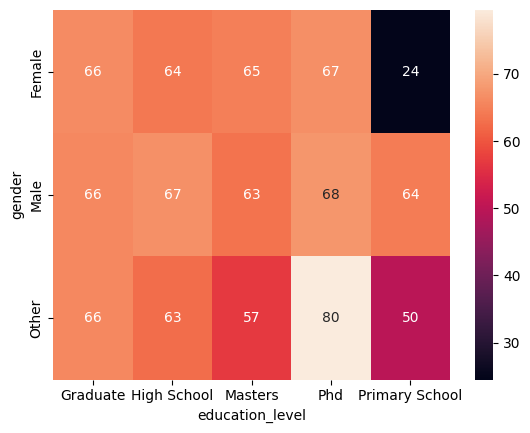

In [73]:
sns.heatmap(pivot,annot=True)

In [54]:
#5.   Use a crosstab to analyze enrolled university vs education level, and visualize with bar plot.

In [67]:
cross=pd.crosstab(df.enrolled_university,df.education_level,margins=True)
cross

education_level,Graduate,High School,Masters,Phd,Primary School,All
enrolled_university,,,,,,
Full time course,2278,864,557,25,33,3757
Part time course,805,166,204,12,11,1198
no_enrollment,8975,987,3600,377,264,14203
All,12058,2017,4361,414,308,19158


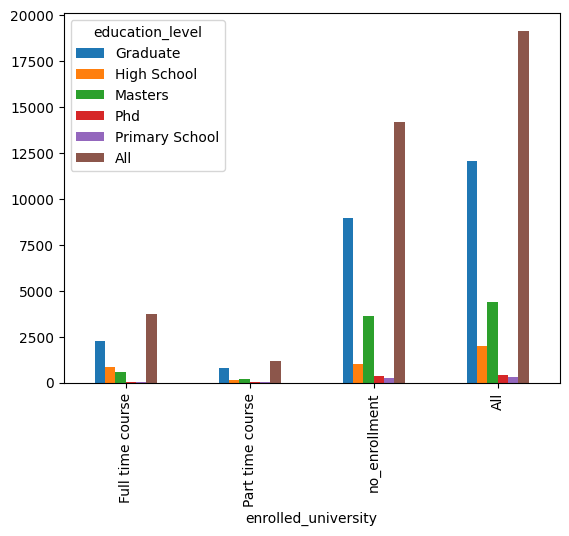

In [68]:
cross.plot(kind='bar')
plt.show()

In [69]:
#Show and plot average city development index by company size.

In [81]:
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [84]:
df['company_size']

0          50-99
1          50-99
2          50-99
3          50-99
4          50-99
          ...   
19153      50-99
19154      50-99
19155      50-99
19156    500-999
19157      50-99
Name: company_size, Length: 19158, dtype: object

In [91]:
avg=df.groupby('company_size')['city_development_index'].mean()
avg

company_size
10/49        0.813927
100-500      0.835129
1000-4999    0.857128
10000+       0.846206
50-99        0.820013
500-999      0.836881
5000-9999    0.849064
<10          0.824622
Name: city_development_index, dtype: float64

<Axes: xlabel='company_size'>

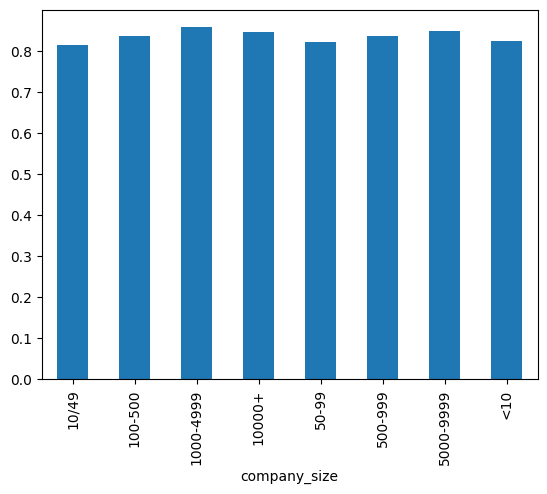

In [93]:
avg.plot(kind='bar')

In [105]:
#Use sort_index() to plot training hours by company size.
df['training_hours']

0         36
1         47
2         83
3         52
4          8
        ... 
19153     42
19154     52
19155     44
19156     97
19157    127
Name: training_hours, Length: 19158, dtype: int64

In [114]:
sort=df.groupby('company_size')['training_hours'].mean().sort_index()
sort

company_size
10/49        66.925901
100-500      63.984442
1000-4999    64.621235
10000+       64.523526
50-99        65.898903
500-999      64.282782
5000-9999    64.543517
<10          65.801988
Name: training_hours, dtype: float64

<Axes: xlabel='company_size'>

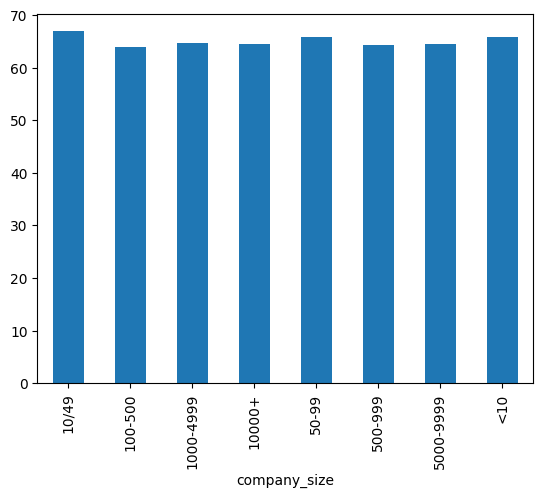

In [115]:
sort.plot(kind='bar')

In [116]:
#8.Plot standard deviation of city development index by last_new_job using seaborn.

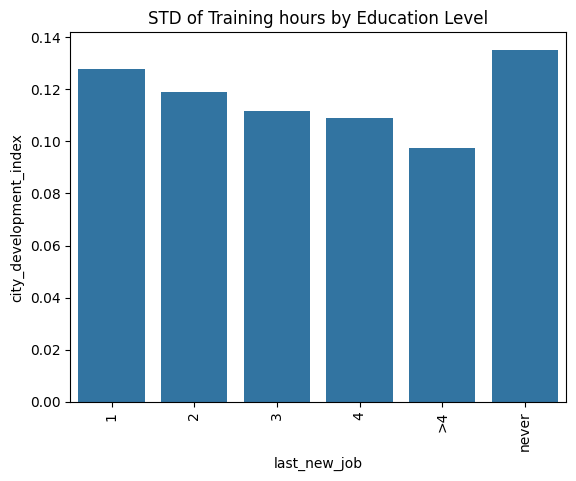

In [118]:
std_dev=df.groupby('last_new_job')['city_development_index'].std().reset_index()
sns.barplot(data=std_dev,x='last_new_job',y='city_development_index')
plt.title('STD of Training hours by Education Level')
plt.xticks(rotation=90)
plt.show()

In [134]:
#9. Count people who changed jobs (target=1) by gender,and visualize.

In [135]:
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [138]:
change_jobs=df.groupby('gender')['target'].count()
change_jobs

gender
Female     1238
Male      17729
Other       191
Name: target, dtype: int64

<Axes: xlabel='gender'>

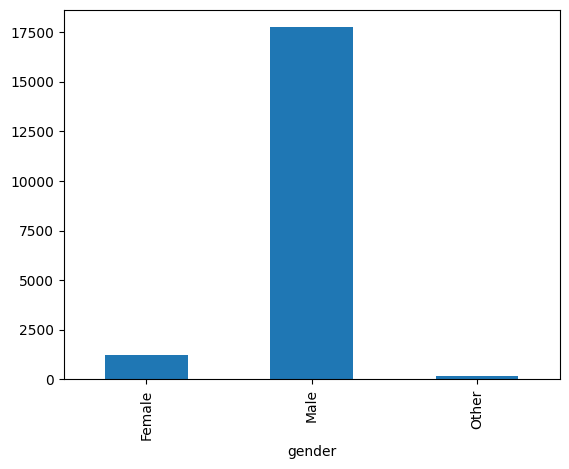

In [139]:
change_jobs.plot(kind='bar')

In [124]:
#10.Heatmap of job change rate by major discipline and education level (pivot + heatmap).

In [130]:
df['major_discipline']

0                   STEM
1                   STEM
2                   STEM
3        Business Degree
4                   STEM
              ...       
19153         Humanities
19154               STEM
19155               STEM
19156               STEM
19157               STEM
Name: major_discipline, Length: 19158, dtype: object

In [193]:
pivoted=df.pivot_table(index='major_discipline',columns='education_level',values='target')
#target means looking for job change
pivoted

education_level,Graduate,High School,Masters,Phd,Primary School
major_discipline,,,,,
Arts,0.182692,NaN,0.333333,0.333333,NaN
Business Degree,0.268908,NaN,0.255814,0.000000,NaN
Humanities,0.230952,NaN,0.177778,0.166667,NaN
No Major,0.257732,NaN,0.172414,NaN,NaN
Other,0.305147,NaN,0.180000,0.111111,NaN
STEM,0.281279,0.19534,0.215519,0.138667,0.133117


<Axes: xlabel='education_level', ylabel='major_discipline'>

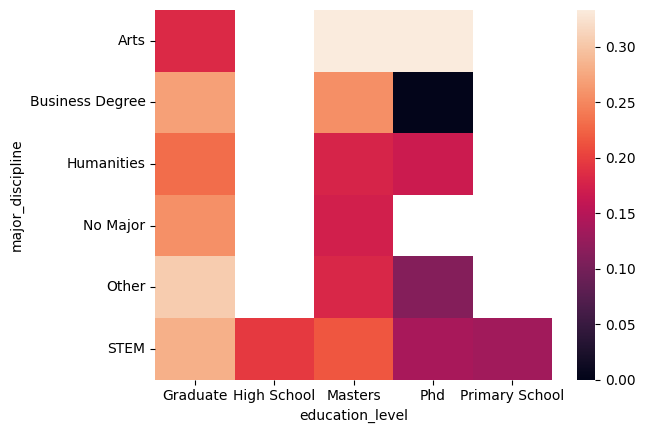

In [194]:
sns.heatmap(pivoted)

In [140]:
#11.Crosstab of experience vs target, plotted as stacked bar.

In [142]:
cross_exp=pd.crosstab(df.experience,df.target,margins=True)
cross_exp

target,0.0,1.0,All
experience,,,
1,316,233,549
10,778,207,985
11,513,151,664
12,402,92,494
13,322,77,399
14,479,107,586
15,572,114,686
16,436,72,508
17,285,57,342


<Axes: xlabel='experience'>

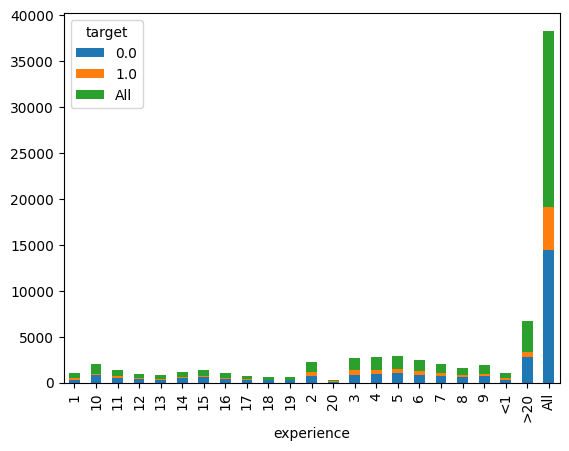

In [143]:
cross_exp.plot(kind='bar',stacked=True)

In [144]:
#12.Group by company_type and education_level using unstack, then show as heatmap.

In [147]:
group=df.groupby('company_type')['education_level'].value_counts().unstack()
group

education_level,Graduate,High School,Masters,Phd,Primary School
company_type,,,,,
Early Stage Startup,382,52,152,10,7
Funded Startup,682,54,233,25,7
NGO,307,29,150,33,2
Other,83,11,25,1,1
Public Sector,493,65,296,97,4
Pvt Ltd,10111,1806,3505,248,287


<Axes: xlabel='education_level', ylabel='company_type'>

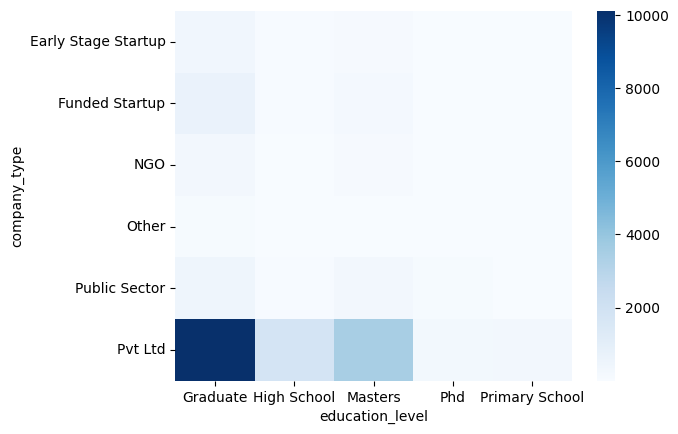

In [152]:
sns.heatmap(group,cmap='Blues')

In [153]:
#13.Pivot: training_hours by last_new_job and gender, then heatmap.

In [154]:
pivot=df.pivot_table(index='last_new_job',columns='gender',values='training_hours')
#target means looking for job change
pivot

gender,Female,Male,Other
last_new_job,,,
1,64.104651,65.904860,65.216867
2,67.619792,65.800224,51.920000
3,71.612903,64.560000,70.500000
4,66.597015,66.181532,47.777778
>4,67.559585,64.127687,62.814815
never,63.467213,64.669717,71.885714


<Axes: xlabel='gender', ylabel='last_new_job'>

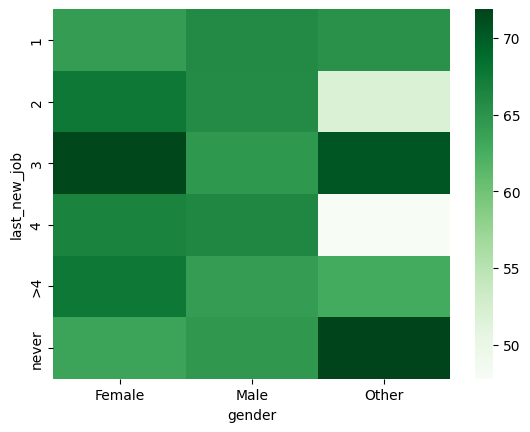

In [155]:
sns.heatmap(pivot,cmap='Greens')

In [156]:
#14.Normalized crosstab of company_size vs target with seaborn barplot.

In [158]:
cross_cmp=pd.crosstab(df.company_size,df.target,margins=True)
cross_cmp

target,0.0,1.0,All
company_size,,,
10/49,1127,344,1471
100-500,2156,415,2571
1000-4999,1128,200,1328
10000+,1634,385,2019
50-99,6066,2955,9021
500-999,725,152,877
5000-9999,461,102,563
<10,1084,224,1308
All,14381,4777,19158


Text(0, 0.5, 'Company Size')

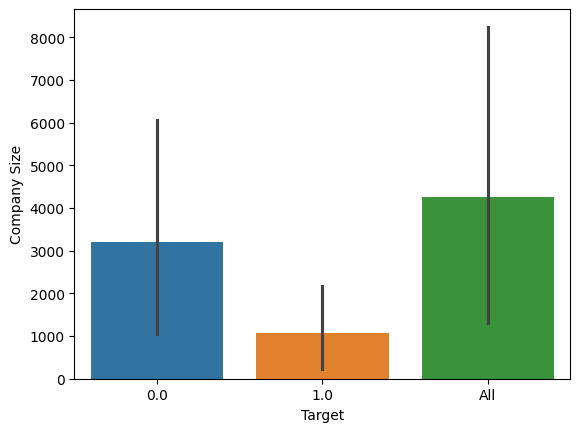

In [161]:
sns.barplot(data=cross_cmp)
plt.xlabel('Target')
plt.ylabel('Company Size')

In [162]:
#15.Plot standard deviation of training_hours by company_type.

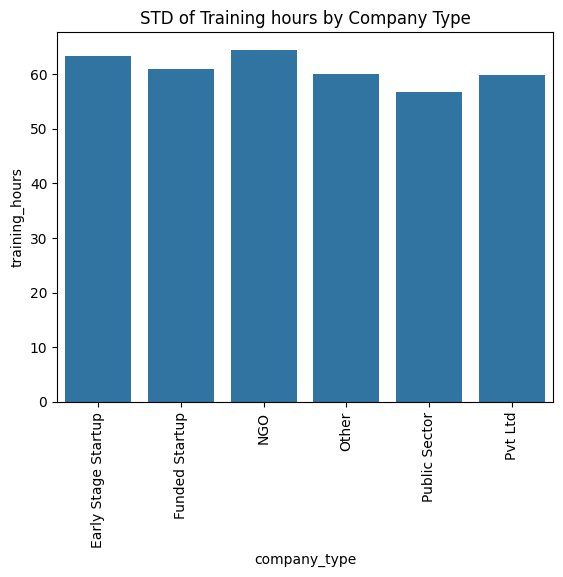

In [163]:
std_dev=df.groupby('company_type')['training_hours'].std().reset_index()
sns.barplot(data=std_dev,x='company_type',y='training_hours')
plt.title('STD of Training hours by Company Type')
plt.xticks(rotation=90)
plt.show()

In [164]:
#16.Plot mean city development index by gender and education level using heatmap.

In [166]:
mean_city=df.groupby(['gender','education_level'])['city_development_index'].mean().unstack()
mean_city

education_level,Graduate,High School,Masters,Phd,Primary School
gender,,,,,
Female,0.843763,0.829522,0.842811,0.894489,0.869250
Male,0.821109,0.833515,0.835020,0.883468,0.849265
Other,0.865785,0.864545,0.886889,0.712750,0.895167


<Axes: xlabel='education_level', ylabel='gender'>

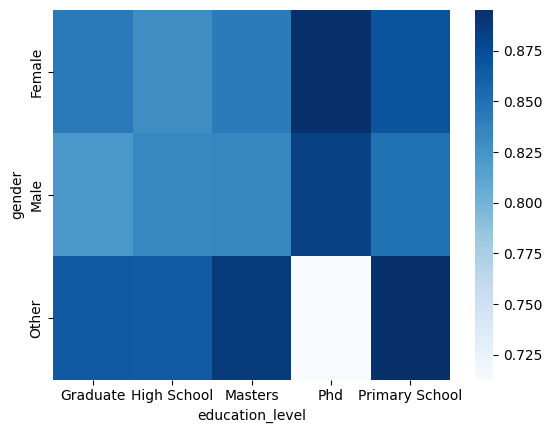

In [167]:
sns.heatmap(mean_city,cmap='Blues')

In [168]:
#17.Median training_hours by university and gender, visualized.

In [170]:
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [171]:
median_training=df.groupby(['gender','enrolled_university'])['training_hours'].mean().unstack()
median_training

enrolled_university,Full time course,Part time course,no_enrollment
gender,,,
Female,69.537037,65.969231,64.733542
Male,64.292871,67.342601,65.481290
Other,59.437500,87.555556,62.160000


<Axes: xlabel='enrolled_university', ylabel='gender'>

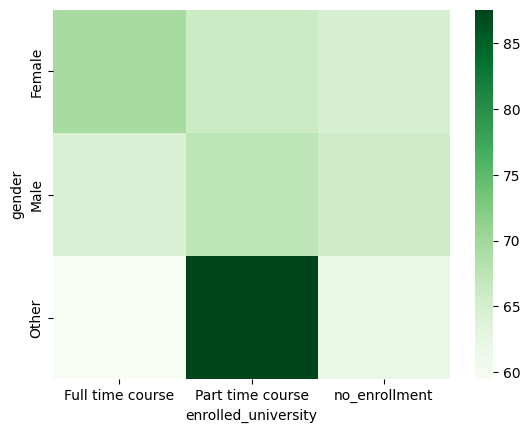

In [172]:
sns.heatmap(median_training,cmap='Greens')

In [174]:
#18.Crosstab: company_type vs last_new_job with stacked bar plot.

In [184]:
df['last_new_job']

0            1
1           >4
2        never
3        never
4            4
         ...  
19153        1
19154        4
19155        4
19156        2
19157        1
Name: last_new_job, Length: 19158, dtype: object

In [191]:
stacked=df.groupby('company_type')['last_new_job'].count()
stacked

company_type
Early Stage Startup      603
Funded Startup          1001
NGO                      521
Other                    121
Public Sector            955
Pvt Ltd                15957
Name: last_new_job, dtype: int64

<Axes: xlabel='company_type'>

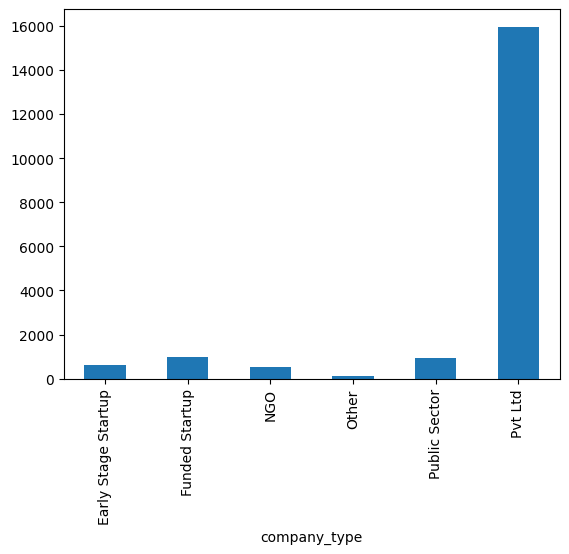

In [189]:
stacked.plot(kind='bar',stacked=True)

In [195]:
#19.Maximum training_hours by gender plotted with barplot.

<Axes: xlabel='gender', ylabel='training_hours'>

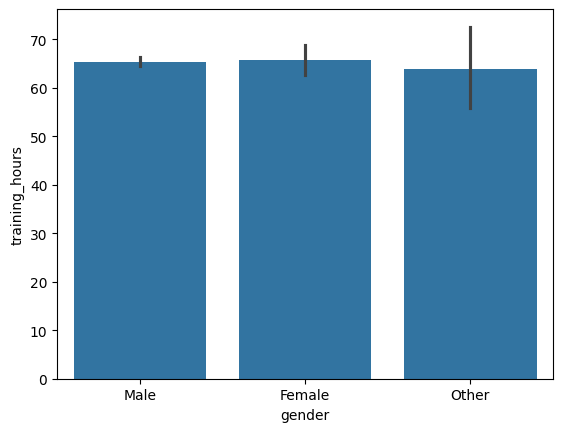

In [196]:
sns.barplot(data=df,x='gender',y='training_hours')

In [197]:
#20.Heatmap: training_hours by target and company_size.

In [202]:
hmap=df.groupby(['target','company_size'])['training_hours'].mean().unstack()
hmap

company_size,10/49,100-500,1000-4999,10000+,50-99,500-999,5000-9999,<10
target,,,,,,,,
0.0,68.758651,63.75000,63.765957,64.630967,67.261787,65.536552,65.544469,66.947417
1.0,60.921512,65.20241,69.445000,64.067532,63.101184,58.302632,60.019608,60.258929


<Axes: xlabel='company_size', ylabel='target'>

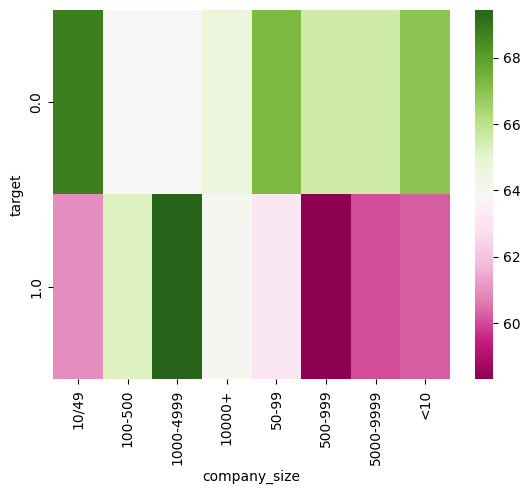

In [204]:
sns.heatmap(hmap,cmap='PiYG')

In [205]:
#21.Count people per major discipline and gender, shown as heatmap.

In [206]:
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [220]:
people=df.groupby(['major_discipline','gender']).size().unstack()
people

gender,Female,Male,Other
major_discipline,,,
Arts,36,210,7
Business Degree,25,299,3
Humanities,118,543,8
No Major,16,204,3
Other,36,338,7
STEM,1007,16135,163


<Axes: xlabel='gender', ylabel='major_discipline'>

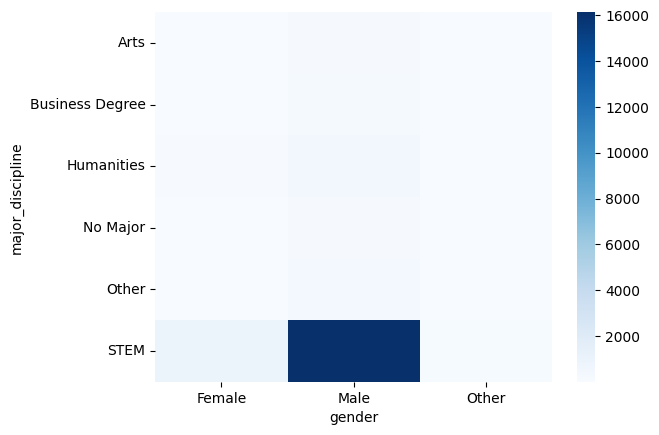

In [221]:
sns.heatmap(people,cmap='Blues')

In [222]:
#22.Compare std of city index for each education level using horizontal bar chart.

In [223]:
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [224]:
ed_std=df.groupby('education_level')['city_development_index'].std()
ed_std

education_level
Graduate          0.127503
High School       0.118761
Masters           0.115828
Phd               0.081334
Primary School    0.111571
Name: city_development_index, dtype: float64

<Axes: xlabel='city_development_index', ylabel='education_level'>

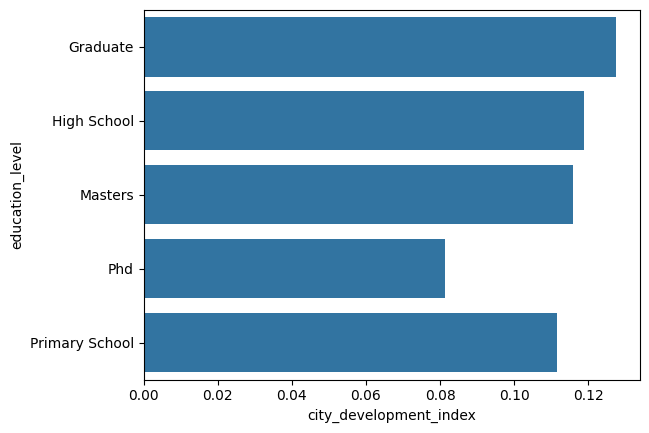

In [226]:
sns.barplot(ed_std,orient='h')

In [250]:
#23.Visualize average job change rate by experience using a line plot. !skipped

In [251]:
exp=df.groupby('experience')['target'].value_counts().unstack()
exp

target,0.0,1.0
experience,,
1,316,233
10,778,207
11,513,151
12,402,92
13,322,77
14,479,107
15,572,114
16,436,72
17,285,57


In [261]:
job_change=exp[[1.0]]
job_change

target,1.0
experience,
1,233
10,207
11,151
12,92
13,77
14,107
15,114
16,72
17,57


<Axes: xlabel='experience'>

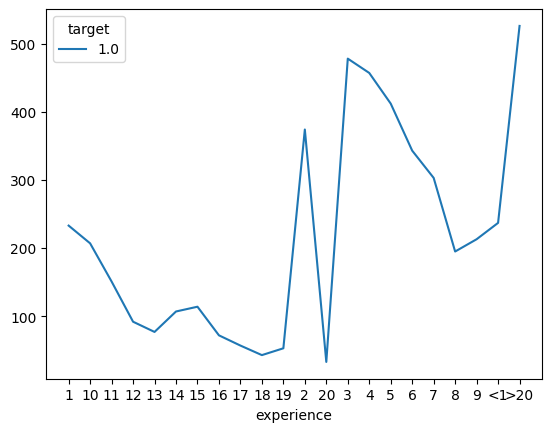

In [262]:
sns.lineplot(job_change)

In [263]:
#24.Pivot training_hours by education and target, heatmap the result.

In [247]:
heat=df.pivot_table(index='education_level',columns='target',values='training_hours')
#target means looking for job change
heat

target,0.0,1.0
education_level,,
Graduate,66.742450,63.621380
High School,66.619840,66.931472
Masters,64.073847,60.328342
Phd,68.379213,62.275862
Primary School,65.685393,50.219512


<Axes: xlabel='target', ylabel='education_level'>

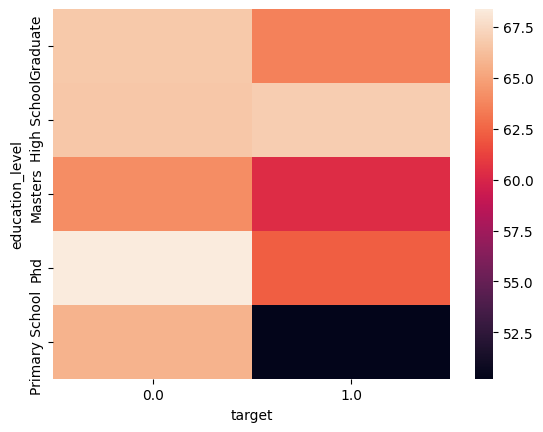

In [248]:
sns.heatmap(heat)

In [249]:
#25.Crosstab of gender vs target, barplot with Seaborn.

In [253]:
cross_gen=pd.crosstab(df.gender,df.target,margins=True)
cross_gen

target,0.0,1.0,All
gender,,,
Female,912,326,1238
Male,13328,4401,17729
Other,141,50,191
All,14381,4777,19158


<Axes: xlabel='target'>

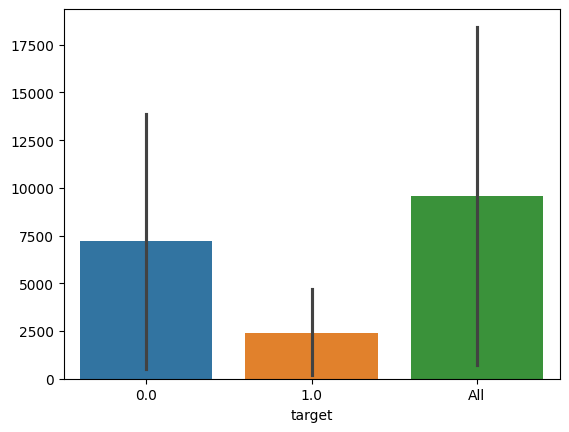

In [264]:
sns.barplot(cross_gen)

In [265]:
#26.Use unstack to analyze gender & enrolled_university and heatmap.

In [267]:
analyze=df.groupby(['gender','enrolled_university']).size().unstack()
analyze

enrolled_university,Full time course,Part time course,no_enrollment
gender,,,
Female,216,65,957
Male,3493,1115,13121
Other,48,18,125


<Axes: xlabel='enrolled_university', ylabel='gender'>

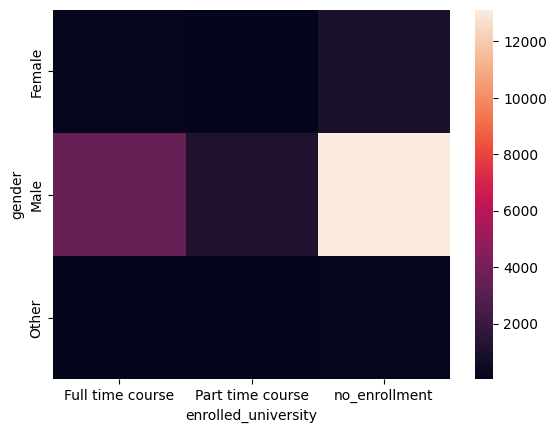

In [268]:
sns.heatmap(analyze)

In [1]:
#27.Violin plot of training hours by education level.

<Axes: xlabel='education_level'>

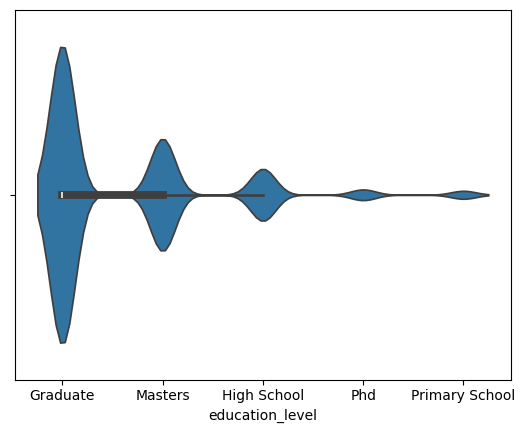

In [8]:
sns.violinplot(data=df,x='education_level')

In [9]:
#28.Histogram of city index by job change target.

In [10]:
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [16]:
x=df.groupby('city_development_index')['target'].count()
x

city_development_index
0.448      17
0.479      28
0.487       5
0.493      13
0.512       5
         ... 
0.924     301
0.925     171
0.926    1336
0.939     497
0.949      79
Name: target, Length: 93, dtype: int64

<Axes: ylabel='Frequency'>

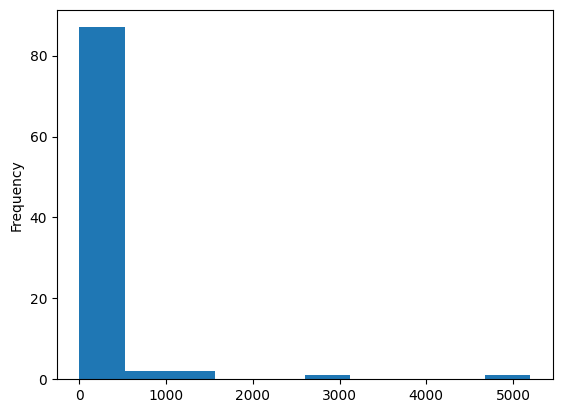

In [17]:
x.plot(kind='hist')

In [18]:
#29.Heatmap of target (mean) by gender and major_discipline.

In [22]:
g_m_mean=df.groupby(['gender','major_discipline'])['target'].mean().unstack()
g_m_mean

major_discipline,Arts,Business Degree,Humanities,No Major,Other,STEM
gender,,,,,,
Female,0.250000,0.280000,0.237288,0.500000,0.277778,0.262931
Male,0.206250,0.252212,0.202797,0.226994,0.234818,0.238738
Other,0.285714,0.000000,0.250000,0.000000,0.142857,0.304348


<Axes: xlabel='major_discipline', ylabel='gender'>

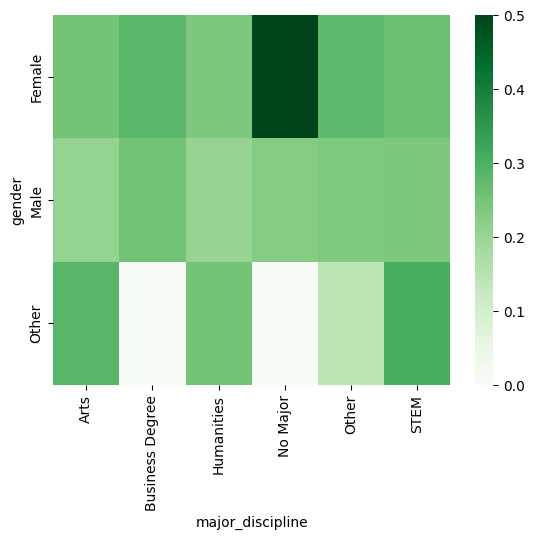

In [24]:
sns.heatmap(g_m_mean,cmap='Greens')

In [25]:
#30.Stripplot of training hours by company type.

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Pvt Ltd'),
  Text(1, 0, 'Funded Startup'),
  Text(2, 0, 'Early Stage Startup'),
  Text(3, 0, 'Other'),
  Text(4, 0, 'Public Sector'),
  Text(5, 0, 'NGO')])

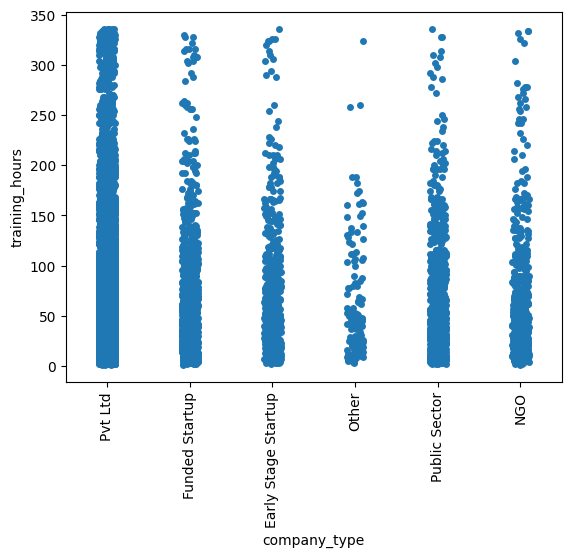

In [28]:
sns.stripplot(data=df,x='company_type',y='training_hours')
plt.xticks(rotation=90)